# Assignment 3 - SMAI - DoubleMNIST and PermutedMnist

In [1]:
import os
import sys

# enter the Foldername here:
FOLDERNAME = "/home/richard/play/IIITH/sem5/smai/assignments/assignment-3-fine-man"

if FOLDERNAME is None or not os.path.exists(FOLDERNAME):
    FOLDERNAME = os.getcwd()

PATHNAME = f"{FOLDERNAME}"
sys.path.append(f"{FOLDERNAME}")

# DATA_FOLDER = os.path.join(FOLDERNAME, "SMAI-Dataset-release/IIIT-CFW")
DATA_FOLDER = os.path.join(FOLDERNAME, "datasets")
YAML_FOLDER = os.path.join(FOLDERNAME, "yaml-files")
print(DATA_FOLDER)
print(YAML_FOLDER)

/home/vanshg/play/IIIITH/sem5/smai/assignments/assignment-3-fine-man/datasets
/home/vanshg/play/IIIITH/sem5/smai/assignments/assignment-3-fine-man/yaml-files


In [2]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import copy
import os
import glob
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer

import wandb

In [4]:
from src_torch import *
from src_torch.classifiers import *

In [5]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vanshg. Use `wandb login --relogin` to force relogin


True

## (5.1) Multi-digit Recognition on Multi-MNIST Dataset

### (5.1.0) Data Loading, Preprocessing and Visualization

In [6]:
DOUBLE_MNIST_FOLDER = os.path.join(DATA_FOLDER, "DOUBLE_MNIST")

train_img_paths = []
val_img_paths = []
test_img_paths = []

# Saving path of all images in train set
for img_folder in glob.glob(os.path.join(DOUBLE_MNIST_FOLDER, "train/*")):
    label = int(os.path.basename(img_folder))
    for img_file in glob.glob(os.path.join(img_folder, "*")):
        train_img_paths.append(img_file)

# Saving path of all images in val set
for img_folder in glob.glob(os.path.join(DOUBLE_MNIST_FOLDER, "val/*")):
    label = int(os.path.basename(img_folder))
    for img_file in glob.glob(os.path.join(img_folder, "*")):
        val_img_paths.append(img_file)

# Saving path of all images in test set
for img_folder in glob.glob(os.path.join(DOUBLE_MNIST_FOLDER, "test/*")):
    label = int(os.path.basename(img_folder))
    for img_file in glob.glob(os.path.join(img_folder, "*")):
        test_img_paths.append(img_file)

print(f"Length of Training data: {len(train_img_paths)}")
print(f"Length of Validation data: {len(val_img_paths)}")
print(f"Length of Testing Data: {len(test_img_paths)}")

Length of Training data: 64000
Length of Validation data: 16000
Length of Testing Data: 20000


In [25]:
train_dataset = DoubleMNIST(train_img_paths)
val_dataset = DoubleMNIST(val_img_paths)
test_dataset = DoubleMNIST(test_img_paths)

torch.Size([1, 64, 64])
tensor(0.) tensor(1.)
torch.float32
28


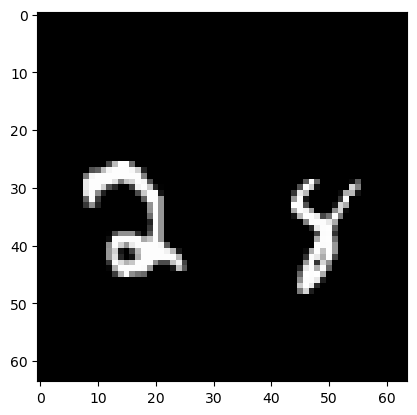

In [27]:
for x, y in train_dataset:
    print(x.shape)
    print(x.min(), x.max())
    print(y)
    plt.imshow(x.squeeze(), cmap='gray')
    break